In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# --- Step 1: Sample Data (Simulated for Cammeo and Osmancik rice types) ---
data = pd.DataFrame({
    'Area': [500, 520, 490, 515, 505, 600, 610, 595, 620, 605],
    'Perimeter': [75, 76, 74, 77, 75.5, 85, 86, 84, 87, 85.5],
    'MajorAxisLength': [50, 52, 49, 51.5, 50.5, 60, 61, 59.5, 62, 60.5],
    'MinorAxisLength': [25, 26, 24.5, 25.5, 25, 30, 31, 29.5, 32, 30.5],
    'Eccentricity': [0.8, 0.82, 0.79, 0.81, 0.8, 0.85, 0.86, 0.84, 0.87, 0.85],
    'ConvexArea': [510, 530, 495, 520, 510, 610, 620, 605, 630, 615],
    'Extent': [0.7, 0.71, 0.69, 0.7, 0.7, 0.72, 0.73, 0.71, 0.74, 0.72],
    'Class': ['Cammeo']*5 + ['Osmancik']*5
})

# Encode class labels
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])  # Cammeo -> 0, Osmancik -> 1

# --- Step 2: Train-test split ---
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Accuracy: 1.0

Cross-Validation Scores: [1. 1.]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



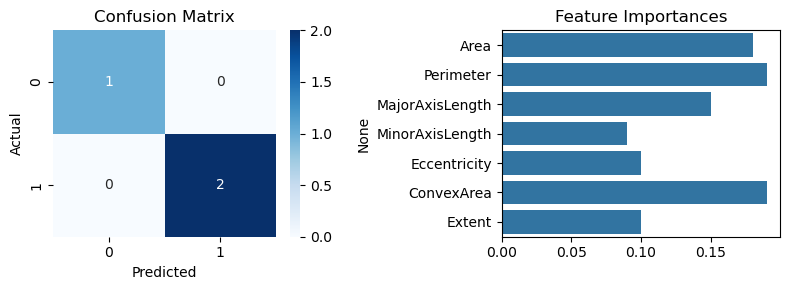

In [12]:
# --- Step 3: Train the model ---
model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=2)  # Only 5 samples per class, use cv=2
model.fit(X_train, y_train)

# --- Step 4: Evaluation ---
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nCross-Validation Scores:", cv_scores)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Step 5: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- Step 6: Visualizations ---
plt.figure(figsize=(8, 3))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Feature Importances
plt.subplot(1, 2, 2)
model.fit(X, y)
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances")

plt.tight_layout()
plt.show()

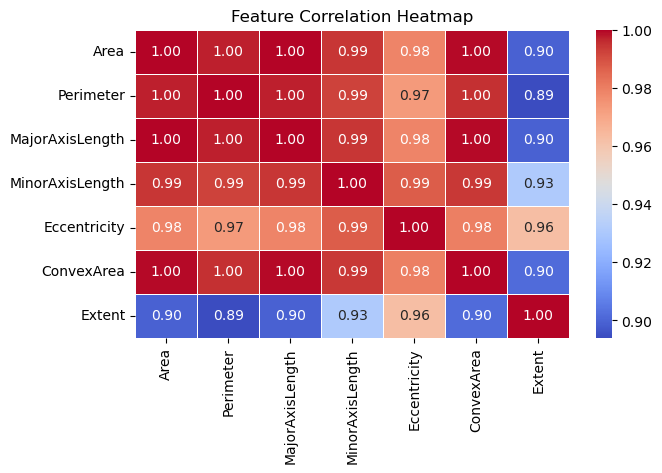

In [15]:
plt.figure(figsize=(7, 4))
corr_matrix = data.drop("Class", axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

